In [1]:
import sys
sys.path.append('..')
from dharani_functions import DharaniHelper

In [2]:
helper = DharaniHelper(specimennum=1,downsample=3)

In [3]:
helper.get_section_numbers()

['1009']

In [4]:
im_arr = helper.get_sectionimage('1009')

In [5]:
im_arr.shape

(8000, 8000, 3)

In [6]:
annot = helper.get_annotation('1009')

In [7]:
len(annot)

103

In [8]:
from ontology_handling import TreeHelper

In [9]:
ontohelper = TreeHelper()

In [10]:
ontohelper.onto_lookup[98]

NodeRecord(acronym='IZ-PRESUB', name='Intermediate zone, presubiculum', level=7, parentid=93, color_hex_triplet='#bcf1ce')

In [11]:
to_draw_list = ontohelper.get_ids_by_level(4,)

In [12]:


from collections import defaultdict
draw_ids = defaultdict(list) # parent:[children]

for annot_id in annot:
    if annot_id in ids_lev4:
        draw_ids[annot_id].append(annot_id)
    else:
        anclist = ontohelper.get_ancestor_ids(annot_id)
        for elt in reversed(anclist):
            if elt in ids_lev4:
                draw_ids[elt].append(annot_id)
                break


In [13]:
draw_ids.keys()

dict_keys([64, 38, 21, 131, 134, 141, 137, 293, 12, 259, 176, 29, 47, 136, 55, 393, 145, 295])

In [19]:
from annotation_handling import get_supershape

In [1]:
# with a list of desired shapes, use get_supershape to merge leaves 



In [14]:
parshapes = {}
for par, chlist in draw_ids.items():
    print(ontohelper.onto_lookup[par])
    parshp = None
    for chi in chlist:
        print('\t',ontohelper.onto_lookup[chi])
        if parshp is None:
            parshp = annot[chi]
        else:
            parshp = parshp.union(annot[chi])

    parshapes[par]=parshp

NodeRecord(acronym='AlCTx', name='Allocortex', level=4, parentid=4, color_hex_triplet='#9BC680')
	 NodeRecord(acronym='IZ-PRESUB', name='Intermediate zone, presubiculum', level=7, parentid=93, color_hex_triplet='#bcf1ce')
	 NodeRecord(acronym='IZ-SUB', name='Intermediate zone, subiculum', level=7, parentid=85, color_hex_triplet='#bcf1ce')
	 NodeRecord(acronym='SVZ-SUB', name='Subventricular zone, subiculum', level=7, parentid=85, color_hex_triplet='#dbabf2')
	 NodeRecord(acronym='VZ-SUB', name='Ventricular zone, subiculum', level=7, parentid=85, color_hex_triplet='#e670be')
	 NodeRecord(acronym='CA1', name='CA1 field of hippocampus', level=8, parentid=83, color_hex_triplet='#8DBF6F')
	 NodeRecord(acronym='CA2', name='CA2 field of hippocampus', level=8, parentid=83, color_hex_triplet='#8DBF6F')
	 NodeRecord(acronym='CP-SUB', name='Cortical plate, subiculum', level=7, parentid=85, color_hex_triplet='#f6ca72')
	 NodeRecord(acronym='MZ-HPF', name='Marginal zone, hippocampal formation', lev

In [15]:
parshapes.keys()

dict_keys([64, 38, 21, 131, 134, 141, 137, 293, 12, 259, 176, 29, 47, 136, 55, 393, 145, 295])

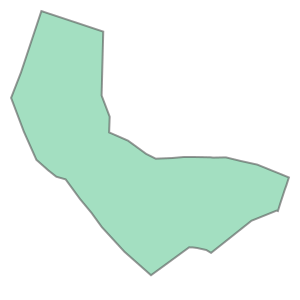

In [16]:
parshapes[134]

In [17]:
from shapely.plotting import plot_polygon

def plot_shape(shp,color):
    plot_polygon(shp, add_points=False, facecolor=color, edgecolor='k')

In [18]:
from matplotlib import pyplot as plt

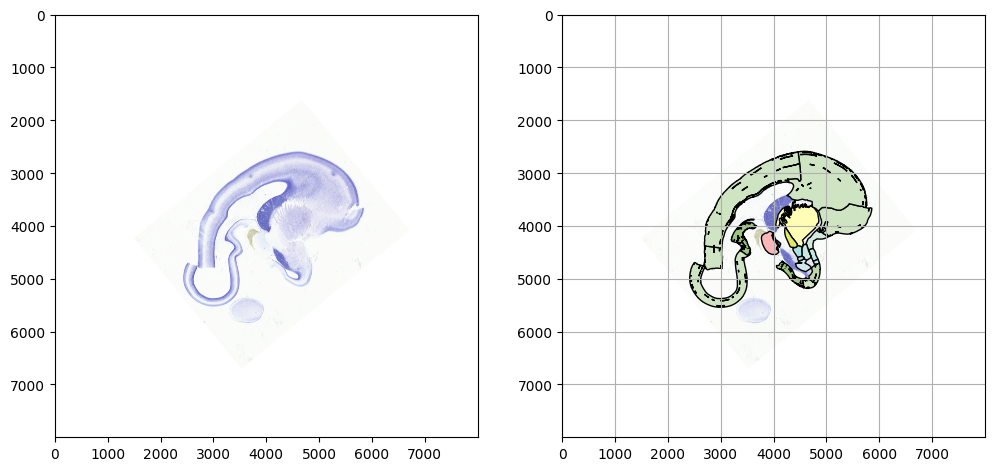

In [28]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(im_arr)

plt.subplot(1,2,2)
plt.imshow(im_arr)
for par,parshp in parshapes.items():
    
    color = ontohelper.onto_lookup[par].color_hex_triplet
    plot_shape(parshp,color)
    # break

In [17]:
from collections import defaultdict

In [29]:
group_regions = defaultdict(list)
group_areas = defaultdict(int)

fullarea = 0

for ontoid in annot:
    grp = ontohelper.get_group_by_ontoid(ontoid)
    shapes = annot[ontoid]
    count = len(shapes)
    area = sum([x.area for x in shapes])
    group_regions[grp].append((ontoid,count,area))
    group_areas[grp]+=area
    fullarea+=area


for grp,vals in group_regions.items():
    print(grp,group_areas[grp]/fullarea,len(vals))

HPF 0.03489960269751205 35
ft 0.04479758136773956 7
dev 0.004264530697871044 4
Ctx 0.5506461216234214 39
CB 0.04081355714387512 1
AMY_BN 0.09956298019743423 11
Mig 0.04205037903498548 2
TH 0.016912539815769893 2
Vs 0.16605270742139103 2


In [25]:
group_areas

defaultdict(int,
            {'HPF': 206219.43943257746,
             'ft': 264705.9394246085,
             'dev': 25198.829269786453,
             'Ctx': 3253731.4396132063,
             'CB': 241164.6043196761,
             'AMY_BN': 588311.0516331289,
             'Mig': 248472.9029061497,
             'TH': 99935.07692389424,
             'Vs': 981194.4433150298})